In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr
from scipy.stats import linregress
from scipy.optimize import curve_fit
from pymer4.models import Lmer
import math
import re
from scipy import optimize
import pwlf
from sklearn.metrics import r2_score
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

In [2]:
path1 = './Result/LMX_data/Forest_AVP/'
T_AVP = []
T_label_AVP = []
for Ti in np.arange(0,31,1):
    T_AVPi = []
    for csv_file in os.listdir(path1):
        numbers = re.findall(r'\d+', csv_file)
        numbers = [int(num) for num in numbers]
        if numbers[1] == Ti:
            data1 = pd.read_csv(path1+csv_file)
            m1, n1 = data1.shape
            for i in range(m1):
                T_AVPi.append(data1['normalized_T'][i]*10+10)
    if len(T_AVPi) > 1000:
        T_AVP.append(T_AVPi)
        T_label_AVP.append(Ti)

path2 = './Result/LMX_data/Forest_VPD/'
T_VPD = []
T_label_VPD = []
for Ti in np.arange(0,31,1):
    T_VPDi = []
    for csv_file in os.listdir(path2):
        numbers = re.findall(r'\d+', csv_file)
        numbers = [int(num) for num in numbers]
        if numbers[1] == Ti:
            data2 = pd.read_csv(path2+csv_file)
            m2, n2 = data2.shape
            for i in range(m2):
                T_VPDi.append(data2['normalized_T'][i]*10+10)
    if len(T_VPDi) > 1000:
        T_VPD.append(T_VPDi)
        T_label_VPD.append(Ti)

In [3]:
T_label_AVP_plot = []
for i in range(len(T_label_AVP)-1):
    T_label_AVP_plot.append(T_label_AVP[i+1])

T_label_VPD_plot = []
for i in range(len(T_label_VPD)-1):
    T_label_VPD_plot.append(T_label_VPD[i+1]+0.5)

T_mean_AVP = []
for i in range(len(T_AVP[1:])):
    T_mean_AVP.append(np.mean(T_AVP[i+1]))

T_mean_VPD = []
for i in range(len(T_VPD[1:])):
    T_mean_VPD.append(np.mean(T_VPD[i+1]))

In [4]:
path1 = './Result/LMX_data/Non_forest_AVP/'
T_AVP1 = []
T_label_AVP1 = []
for Ti in np.arange(0,31,1):
    T_AVPi = []
    for csv_file in os.listdir(path1):
        numbers = re.findall(r'\d+', csv_file)
        numbers = [int(num) for num in numbers]
        if numbers[1] == Ti:
            data1 = pd.read_csv(path1+csv_file)
            m1, n1 = data1.shape
            for i in range(m1):
                T_AVPi.append(data1['normalized_T'][i]*10+10)
    if len(T_AVPi) > 1000:
        T_AVP1.append(T_AVPi)
        T_label_AVP1.append(Ti)

path2 = './Result/LMX_data/Non_forest_VPD/'
T_VPD1 = []
T_label_VPD1 = []
for Ti in np.arange(0,31,1):
    T_VPDi = []
    for csv_file in os.listdir(path2):
        numbers = re.findall(r'\d+', csv_file)
        numbers = [int(num) for num in numbers]
        if numbers[1] == Ti:
            data2 = pd.read_csv(path2+csv_file)
            m2, n2 = data2.shape
            for i in range(m2):
                T_VPDi.append(data2['normalized_T'][i]*10+10)
    if len(T_VPDi) > 1000:
        T_VPD1.append(T_VPDi)
        T_label_VPD1.append(Ti)

In [5]:
T_label_AVP_plot1 = []
for i in range(len(T_label_AVP1)-1):
    T_label_AVP_plot1.append(T_label_AVP1[i+1])

T_label_VPD_plot1 = []
for i in range(len(T_label_VPD1)-1):
    T_label_VPD_plot1.append(T_label_VPD1[i+1]+0.5)

T_mean_AVP1 = []
for i in range(len(T_AVP1[1:])):
    T_mean_AVP1.append(np.mean(T_AVP1[i+1]))

T_mean_VPD1 = []
for i in range(len(T_VPD1[1:])):
    T_mean_VPD1.append(np.mean(T_VPD1[i+1]))

Text(0.04, 0.95, 'Non-forest')

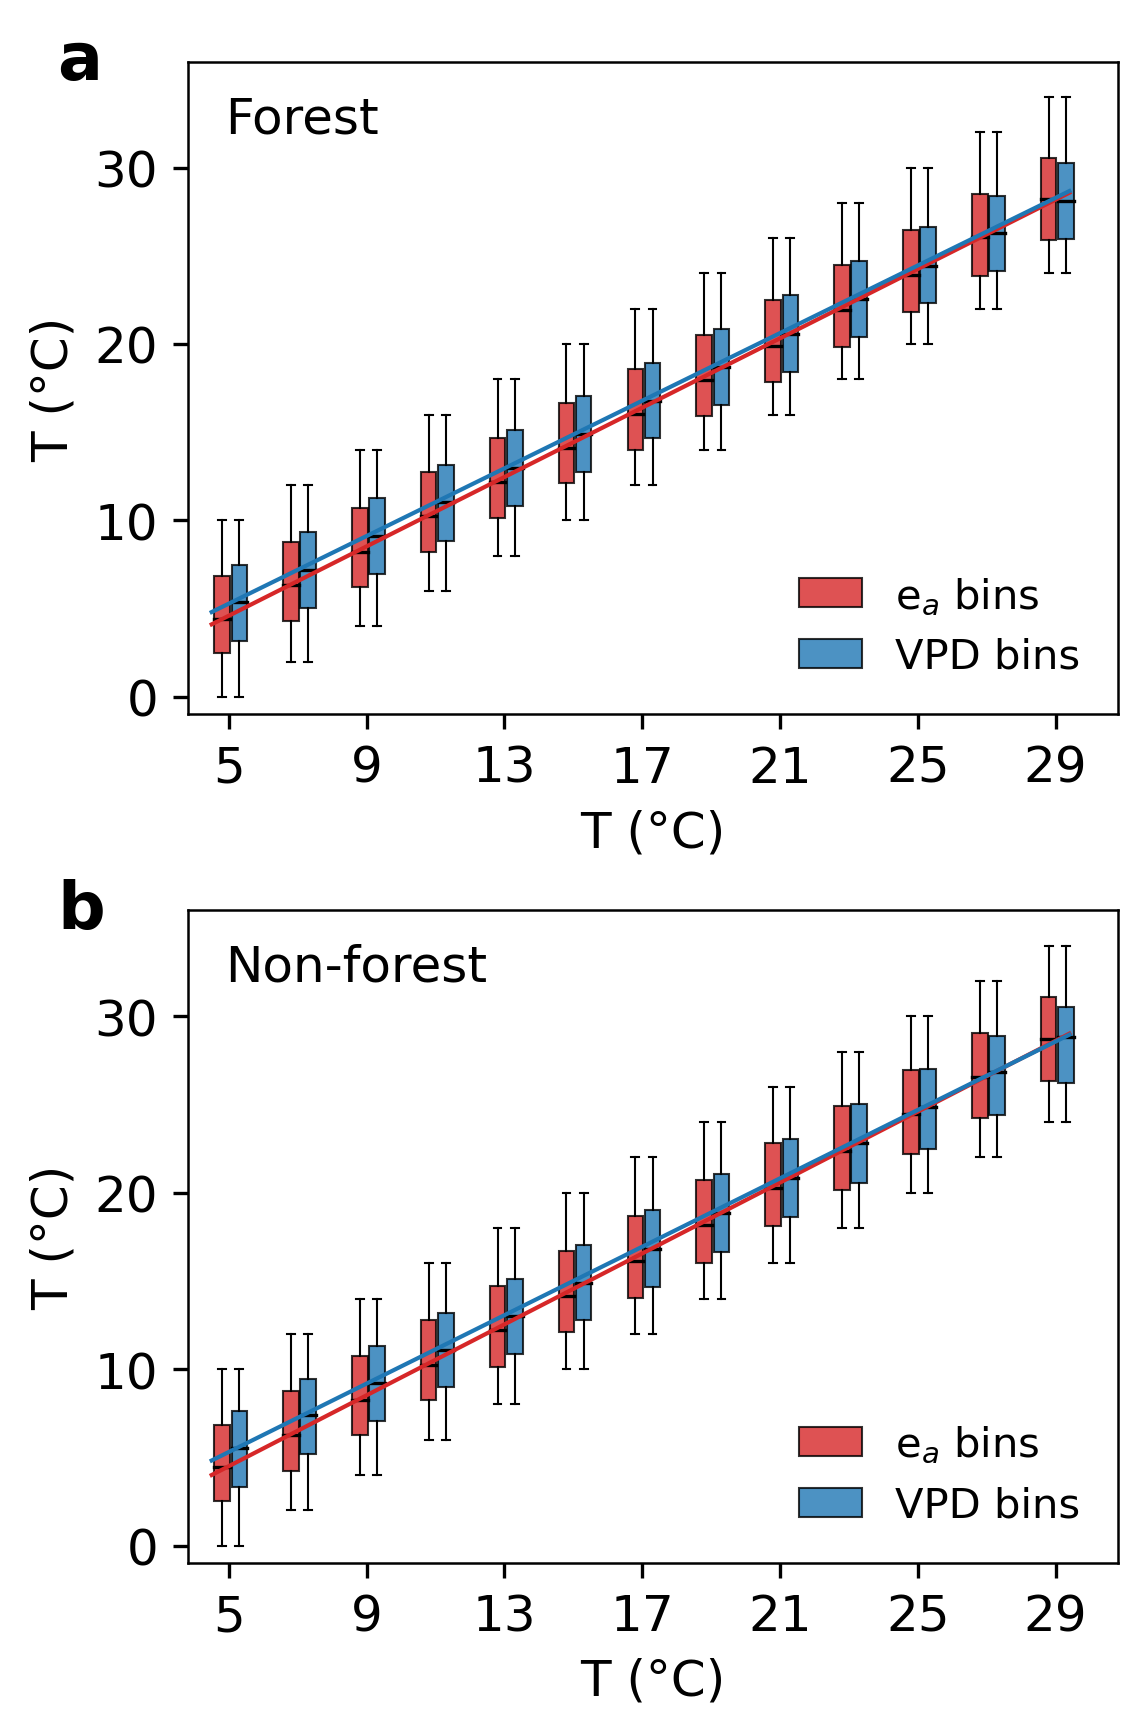

In [6]:
fig = plt.figure(figsize=(4, 6.5),dpi=300)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0, hspace=0.3)
plt.rcParams['axes.linewidth'] = 0.6

##################################################################################################################################################################
ax = fig.add_subplot(2,1,1)

boxplot1 = ax.boxplot(T_AVP[1:], positions=T_label_AVP_plot, patch_artist=True, medianprops={'color':'black', 'linewidth':0.8}, widths=0.45)  #, labels = labels)

boxplot2 = ax.boxplot(T_VPD[1:], positions=T_label_VPD_plot, patch_artist=True, medianprops={'color':'black', 'linewidth':0.8}, widths=0.45)  #, labels = labels)


# 修改线段宽度
for component in boxplot1.keys():
    if component != 'medians':
        for line in boxplot1[component]:
            line.set_linewidth(0.5)
            
for component in boxplot2.keys():
    if component != 'medians':
        for line in boxplot2[component]:
            line.set_linewidth(0.5)


box_color = 'tab:red'
box_alpha = 0.8
for patch in boxplot1['boxes']:
    patch.set_facecolor(box_color)
    patch.set_alpha(box_alpha)
    patch.set_edgecolor('black')  # 设置箱体边框颜色为黑色
    patch.set_linewidth(0.5)
    
box_color = 'tab:blue'
box_alpha = 0.8
for patch in boxplot2['boxes']:
    patch.set_facecolor(box_color)
    patch.set_alpha(box_alpha)
    patch.set_edgecolor('black')  # 设置箱体边框颜色为黑色
    patch.set_linewidth(0.5)

ax.legend([boxplot1['boxes'][0], boxplot2['boxes'][0]], ['e$_{a}$ bins', 'VPD bins'], edgecolor='white', loc='lower right', frameon=False, handlelength = 1.5)    

# 设置x轴刻度标签
ax.set_xticks([])

#T_label_AVP_plot = np.array(T_label_AVP_plot)
T_label_VPD_plot = np.array(T_label_VPD_plot)
##ax.set_xticks(np.concatenate([T_label_AVP_plot, T_label_VPD_plot]))
#ax.set_xticklabels(T_label_AVP + T_label_VPD)

ax.set_xlabel('T (°C)',size = 12)
ax.set_ylabel('T (°C)',size = 12)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_ylim(-1,36)
ax.set_yticks(np.linspace(0,30,4))

labels = []
for i in range(13):
    if i%2==0:
        labels.append(5+i*2+0.2)
    else:
        labels.append(0)


ax.set_xticks(labels)  # 设置x轴刻度为1
#ax.set_xticks([5.2, 7.2])  # 设置x轴刻度为1
ax.set_xlim(4,31)


x = T_label_AVP_plot
y = T_mean_AVP
coefficients = np.polyfit(x, y, 1)
p = np.poly1d(coefficients)
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - p(x))**2)
r_squared = 1 - (ss_residual / ss_total)

x_plot = np.arange(4.5,29.5,0.1)
ax.plot(x_plot+0.2, p(x_plot), color='tab:red', linewidth=1, label='Forest\ny=-0.022x+1.88'+'\nR$^{2}$ = '+str(round(r_squared,2)), zorder=4)

x = T_label_AVP_plot
y = T_mean_VPD
coefficients = np.polyfit(x, y, 1)
p = np.poly1d(coefficients)
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - p(x))**2)
r_squared = 1 - (ss_residual / ss_total)

x_plot = np.arange(4.5,29.5,0.1)
ax.plot(x_plot+0.2, p(x_plot), color='tab:blue', linewidth=1, label='Forest\ny=-0.022x+1.88'+'\nR$^{2}$ = '+str(round(r_squared,2)), zorder=4)
ax.text(-0.14, 1.05, "a", transform=ax.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')
ax.text(0.04, 0.95, "Forest", transform=ax.transAxes,
         fontsize=12, fontweight='normal', va='top', ha='left')




#################################################################################################################################################################
ax2 = fig.add_subplot(2,1,2)

boxplot3 = ax2.boxplot(T_AVP1[1:], positions=T_label_AVP_plot1, patch_artist=True, medianprops={'color':'black', 'linewidth':0.8}, widths=0.45)  #, labels = labels)

boxplot4 = ax2.boxplot(T_VPD1[1:], positions=T_label_VPD_plot1, patch_artist=True, medianprops={'color':'black', 'linewidth':0.8}, widths=0.45)  #, labels = labels)


# 修改线段宽度
for component in boxplot3.keys():
    if component != 'medians':
        for line in boxplot3[component]:
            line.set_linewidth(0.5)
            
for component in boxplot4.keys():
    if component != 'medians':
        for line in boxplot4[component]:
            line.set_linewidth(0.5)


box_color = 'tab:red'
box_alpha = 0.8
for patch in boxplot3['boxes']:
    patch.set_facecolor(box_color)
    patch.set_alpha(box_alpha)
    patch.set_edgecolor('black')  # 设置箱体边框颜色为黑色
    patch.set_linewidth(0.5)
    
box_color = 'tab:blue'
box_alpha = 0.8
for patch in boxplot4['boxes']:
    patch.set_facecolor(box_color)
    patch.set_alpha(box_alpha)
    patch.set_edgecolor('black')  # 设置箱体边框颜色为黑色
    patch.set_linewidth(0.5)

ax2.legend([boxplot3['boxes'][0], boxplot4['boxes'][0]], ['e$_{a}$ bins', 'VPD bins'], edgecolor='white', loc='lower right', frameon=False, handlelength = 1.5)    

# 设置x轴刻度标签
ax2.set_xticks([])
T_label_VPD_plot1 = np.array(T_label_VPD_plot1)


ax2.set_xlabel('T (°C)',size = 12)
ax2.set_ylabel('T (°C)',size = 12)
ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)
ax2.set_ylim(-1,36)
ax2.set_yticks(np.linspace(0,30,4))

labels = []
for i in range(13):
    if i%2==0:
        labels.append(5+i*2+0.2)
    else:
        labels.append(0)


ax2.set_xticks(labels)  # 设置x轴刻度为1
ax2.set_xlim(4,31)

x = T_label_AVP_plot1
y = T_mean_AVP1
coefficients = np.polyfit(x, y, 1)
p = np.poly1d(coefficients)
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - p(x))**2)
r_squared = 1 - (ss_residual / ss_total)

x_plot = np.arange(4.5,29.5,0.1)
ax2.plot(x_plot+0.2, p(x_plot), color='tab:red', linewidth=1, label='Forest\ny=-0.022x+1.88'+'\nR$^{2}$ = '+str(round(r_squared,2)), zorder=4)

x = T_label_AVP_plot1
y = T_mean_VPD1
coefficients = np.polyfit(x, y, 1)
p = np.poly1d(coefficients)
y_mean = np.mean(y)
ss_total = np.sum((y - y_mean)**2)
ss_residual = np.sum((y - p(x))**2)
r_squared = 1 - (ss_residual / ss_total)

x_plot = np.arange(4.5,29.5,0.1)
ax2.plot(x_plot+0.2, p(x_plot), color='tab:blue', linewidth=1, label='Forest\ny=-0.022x+1.88'+'\nR$^{2}$ = '+str(round(r_squared,2)), zorder=4)
ax2.text(-0.14, 1.05, "b", transform=ax2.transAxes,
         fontsize=16, fontweight='bold', va='top', ha='left')
ax2.text(0.04, 0.95, "Non-forest", transform=ax2.transAxes,
         fontsize=12, fontweight='normal', va='top', ha='left')
#plt.savefig('C:/Users/111/Desktop/project1.1_图片/ver2/valid_s2.pdf', format='pdf')